In [83]:
%%writefile requirements.txt

pandas==1.5.3
numpy==1.26.1
seaborn==0.13.2
ipywidgets==8.1.3
scikit-learn

Overwriting requirements.txt


In [84]:
%pip install -r requirements.txt

In [85]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [86]:
df = pd.read_csv('data/heartRisk.csv')

In [87]:
df

,isMale,isBlack,isSmoker,isDiabetic,isHypertensive,Age,Systolic,Cholesterol,HDL,Risk
0,1,1,0,1,1,49,101,181,32,11.1
1,0,0,0,1,1,69,167,155,59,30.1
2,0,1,1,1,1,50,181,147,59,37.6
3,1,1,1,1,0,42,145,166,46,13.2
4,0,0,1,0,1,66,134,199,63,15.1
...,...,...,...,...,...,...,...,...,...,...
995,1,0,1,1,1,42,110,175,67,3.9
996,0,1,0,1,0,75,123,130,56,23.9
997,1,1,1,0,1,76,178,179,30,61.3
998,0,1,1,1,0,65,139,169,66,32.3


In [88]:
X = df.drop('Risk', axis = 1)
y = df['Risk']

In [89]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [90]:

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [91]:


lr_r2 = r2_score(y_test, lr_pred)

print(lr_r2)

0.8063221229048128


In [92]:
risk_min = df['Risk'].min()
risk_max = df['Risk'].max()

In [93]:
# Widgets for user input
isMale_input = widgets.Checkbox(description='isMale')
isBlack_input = widgets.Checkbox(description='isBlack')
isSmoker_input = widgets.Checkbox(description='isSmoker')
isDiabetic_input = widgets.Checkbox(description='isDiabetic')
isHypertensive_input = widgets.Checkbox(description='isHypertensive')
Age_input = widgets.IntSlider(description='Age', min=20, max=90, value=40)
Systolic_input = widgets.IntSlider(description='Systolic', min=80, max=200, value=120)
Cholesterol_input = widgets.IntSlider(description='Cholesterol', min=100, max=300, value=180)
HDL_input = widgets.IntSlider(description='HDL', min=20, max=100, value=50)
output = widgets.Output()

In [94]:
def collect_input():
    return pd.DataFrame([{
        'isMale': int(isMale_input.value),
        'isBlack': int(isBlack_input.value),
        'isSmoker': int(isSmoker_input.value),
        'isDiabetic': int(isDiabetic_input.value),
        'isHypertensive': int(isHypertensive_input.value),
        'Age': Age_input.value,
        'Systolic': Systolic_input.value,
        'Cholesterol': Cholesterol_input.value,
        'HDL': HDL_input.value
    }])

In [95]:
def predict_risk(change=None):
    with output:
        output.clear_output()
        user_input_df = collect_input()
        prediction = lr.predict(user_input_df)
        # Clip the prediction to the range of the Risk column
        clipped_prediction = np.clip(prediction, risk_min, risk_max)
        print(f'Predicted Risk: {clipped_prediction[0]:.2f}')

In [96]:
for widget in [isMale_input, isBlack_input, isSmoker_input, isDiabetic_input, 
               isHypertensive_input, Age_input, Systolic_input, Cholesterol_input, HDL_input]:
    widget.observe(predict_risk, names='value')

In [97]:
display(isMale_input, isBlack_input, isSmoker_input, isDiabetic_input, isHypertensive_input,
        Age_input, Systolic_input, Cholesterol_input, HDL_input, output)

Checkbox(value=False, description='isMale')

Checkbox(value=False, description='isBlack')

Checkbox(value=False, description='isSmoker')

Checkbox(value=False, description='isDiabetic')

Checkbox(value=False, description='isHypertensive')

IntSlider(value=40, description='Age', max=90, min=20)

IntSlider(value=120, description='Systolic', max=200, min=80)

IntSlider(value=180, description='Cholesterol', max=300, min=100)

IntSlider(value=50, description='HDL', min=20)

Output()

In [98]:
predict_risk()

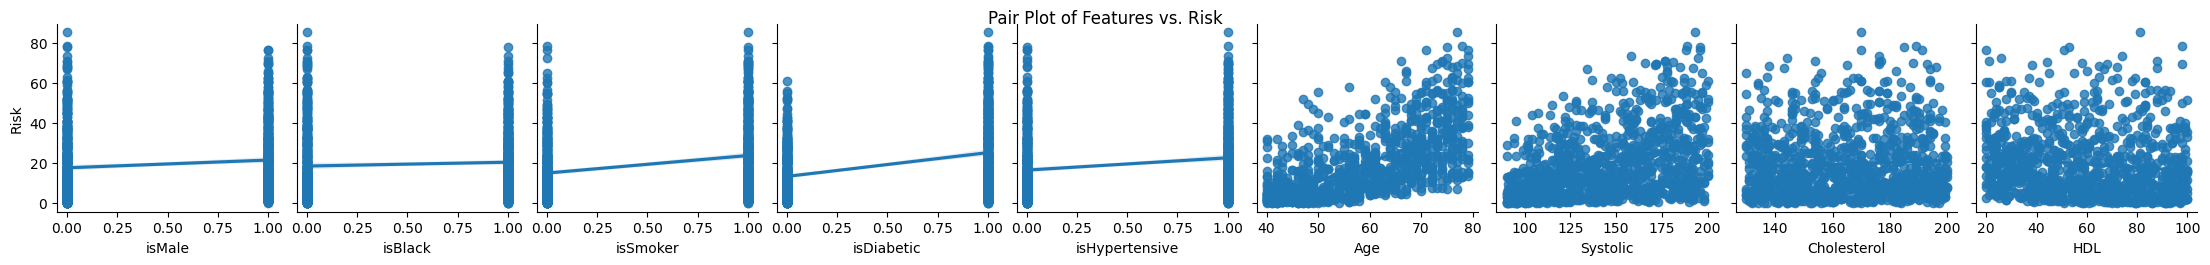

In [99]:
# Visualization 1: Pair Plot
sns.pairplot(df, y_vars=['Risk'], x_vars=df.columns[:-1], kind='reg')
plt.suptitle('Pair Plot of Features vs. Risk', y=1.02)
plt.show()


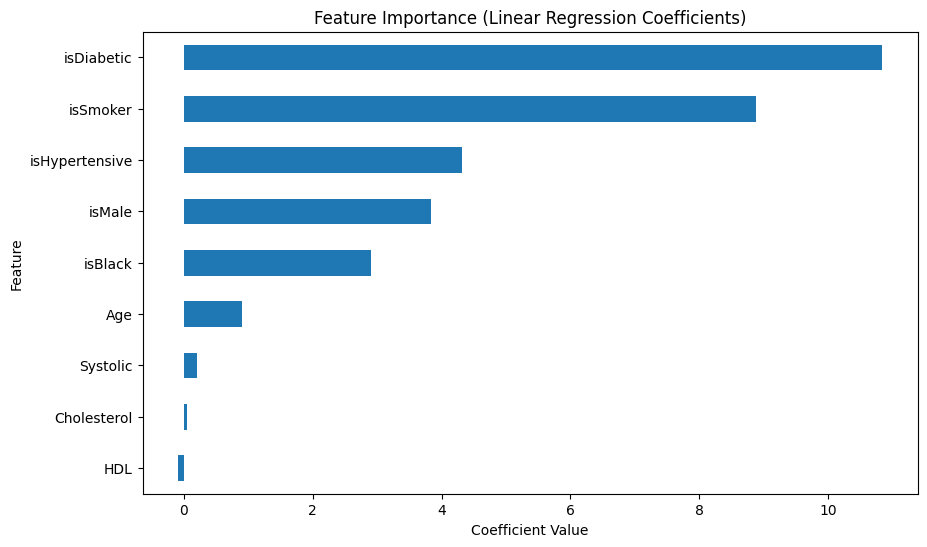

In [100]:
coefficients = pd.Series(lr.coef_, index=X.columns)
coefficients = coefficients.sort_values()
coefficients.plot(kind='barh', figsize=(10, 6))
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance (Linear Regression Coefficients)')
plt.show()

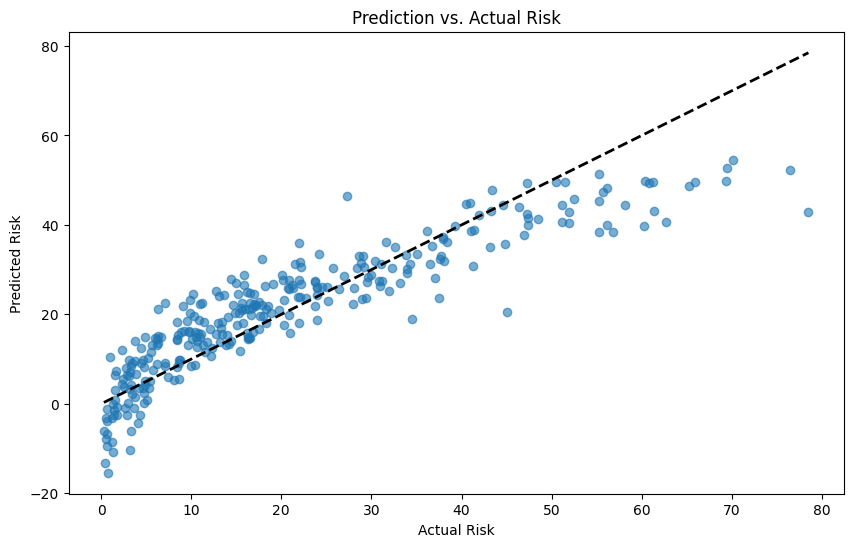

In [101]:
test_pred = lr.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Risk')
plt.ylabel('Predicted Risk')
plt.title('Prediction vs. Actual Risk')
plt.show()

In [102]:
%pip install print-versions

In [103]:
from print_versions import print_versions

import numpy as np
from pandas import DataFrame

print_versions(globals())


pandas==1.5.3
numpy==1.26.1
seaborn==0.13.2
ipywidgets==8.1.3
